# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/james/miniconda3/envs/datasci3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


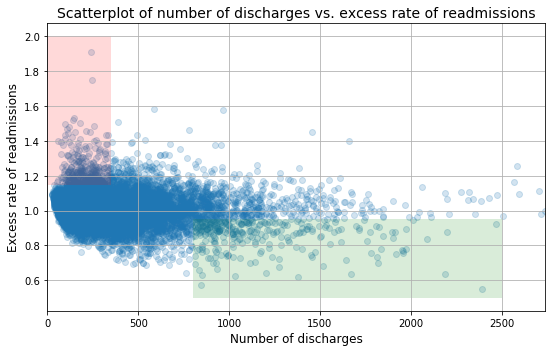

In [156]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

A. The initial set of observations based on the plot are that the rate of readmissions trends down with more discharges, with lower numbers of discharges being associated with excess rates of readmission, and higher numbers of discharges being associated with lower rates of readmission. While the highest excess rates of readmissions do occur when discharges are below 250, and the lowest rates occur when discharges are above ~750, these cases seem to be outliers compared to the main cluster of points on the graph, which appears to be trending flat. Therefore, the first observation is incorrect, while the second and third are misleading. 

In [78]:
# Your turn
low_discharge_rate=clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100]
low_rate_mean=low_discharge_rate['Excess Readmission Ratio'].mean()
low_rate_gt_1=(low_discharge_rate['Excess Readmission Ratio']>1).mean()

high_discharge_rate=clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]
high_rate_mean=high_discharge_rate['Excess Readmission Ratio'].mean()
high_rate_gt_1=(high_discharge_rate['Excess Readmission Ratio']>1).mean()
print("In hospitals/facilities where the number of discharges < 100, mean excess readmission rate is " +
      str(np.round(low_rate_mean,3))+ " and " + str(np.round(low_rate_gt_1*100,0)) +
      "% have excess readmission rate greater than 1.")
print("In hospitals/facilities where the number of discharges > 1000, mean excess readmission rate is "+
      str(np.round(high_rate_mean,3))+" and " + str(np.round(high_rate_gt_1*100,0)) +
      "% have excess readmission rate greater than 1.")

In hospitals/facilities where the number of discharges < 100, mean excess readmission rate is 1.023 and 59.0% have excess readmission rate greater than 1.
In hospitals/facilities where the number of discharges > 1000, mean excess readmission rate is 0.978 and 44.0% have excess readmission rate greater than 1.


The statistics results are mostly correct, but of the hospitals/facilities with under 100 discharges, 59% of them have excess readmission rate greater than 1, and not 63%. The reason for this mistake is that there are some hospitals that don't have any data for readmission rate. 63% is the percentage of hospitals with under 100 discharges *and* with non-null data for the 'Excess Readmission Ratio' column that have an excess readmission rate greater than 1.

In [89]:
print(low_discharge_rate.count())
#sum of # of columns with 
print(sum(low_discharge_rate['Excess Readmission Ratio']>1)/
      low_discharge_rate['Excess Readmission Ratio'].count())

Hospital Name                 1269
Provider Number               1269
State                         1269
Measure Name                  1269
Number of Discharges          1269
Footnote                        81
Excess Readmission Ratio      1188
Predicted Readmission Rate    1188
Expected Readmission Rate     1188
Number of Readmissions        1188
Start Date                    1269
End Date                      1269
dtype: int64

0.6321548821548821


In the conclusions section, the claim that there is a strong correlation between hospital capacity (number of discharges) and readmission rates is false. Using the `.corr()` function on the cleaned dataframe to measure the correlation between the two columns, we get a Pearson correlation coefficient of -0.097, which indicates a very weak negative correlation.

In [93]:
clean_hospital_read_df['Number of Discharges'].corr(clean_hospital_read_df['Excess Readmission Ratio'])

-0.09739794351079353

Furthermore, the claim that "Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions" is entirely unfounded speculation -  without measuring what resources the hospitals/facilities have, one cannot claim that small hospital sizes are correlated with a lack of resources, much less a cause of it. Since that point of the conclusion is unfounded, by extension the recommendation that small-capacity hospitals demonstrate upgraded resource allocation for quality care in order to continue operating has no solid reasoning behind it. Similarly, recommending that hospitals and facilities merge with each other so that there are fewer hospitals, but those hospitals are higher capacity, may have little effect on readmission rate, and may make things worse.

B. For our own statistical analysis, we will be conducting a hypothesis test of correlation. 
1. The null hypothesis is that there is no correlation between number of discharges and excess readmission ratio, and the alternative hypothesis is that there is a correlation between the two variables. 
2. The test statistic that we are using is the Pearson correlation coefficient $\rho$ between the two variables, with the observed value being what we had calculated earlier.

In [129]:
hospital_nonull=clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'].notnull()) & 
                                       (clean_hospital_read_df['Excess Readmission Ratio'].notnull())]
discharges=hospital_nonull['Number of Discharges']
readmissions=hospital_nonull['Excess Readmission Ratio']
observed_r=discharges.corr(readmissions)

-0.09739794351079353

We draw 10000 permutation replicates of the discharge variable while keeping the readmissions variable the same, and calculate $\rho$ for each of these permutations.

In [139]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    discharges_permuted = np.random.permutation(discharges)

    # Compute Pearson correlation
    perm_replicates[i] = np.corrcoef(discharges_permuted, readmissions)[0,1]


Finally, we calculate our p-value as the proportion of permutation replicates with a Pearson correlation coefficient less than the observed coefficient.

In [143]:
p = np.sum(perm_replicates<observed_r)/len(perm_replicates)
print("The p-value for this test is "+str(p)+".")

The p-value for this test is 0.0.


In [145]:
clean_hospital_read_df.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.009596,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.009596,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


3. Out of 10000 permutation replicates, not one of them had a Pearson coefficient as large as the one observed. For an $\alpha$ of .01, this is of course statistically significant, meaning that we can reject the null hypothesis that there is no correlation between the two variables.
4. Despite the fact that there is a statistically significant correlation between the variables, from a practical standpoint the correlation is still a very weak one. Following the preliminary report's recommendation to consolidate hospitals so the remaining ones have higher capacities (and higher numbers of discharges) would cause a minor reduction in the readmission rate at best. On the contrary, it may introduce unintended consequences (such as longer transportation times, since people in rural areas may have to travel further to receive care when smaller facilities are shut down). The recommendations should be altered to put less of a heavy focus on increasing the number of discharges at all costs.
5. The advantages of the scatterplot are that one can somewhat deduce a general pattern or correlation that emerges from the individual points of data. Based on how the points are spread, it's possible to see how much randomness there is in the data or the strength of the correlation. However, without some sort of linear regression line, the graph can be open to misinterpretation - the authors of the preliminary report probably saw some of the outliers and assumed the slope of correlation was much steeper than it actually was. Adding a linear regression line to the graph would add clarity and make misinterpretation of the graph less likely.

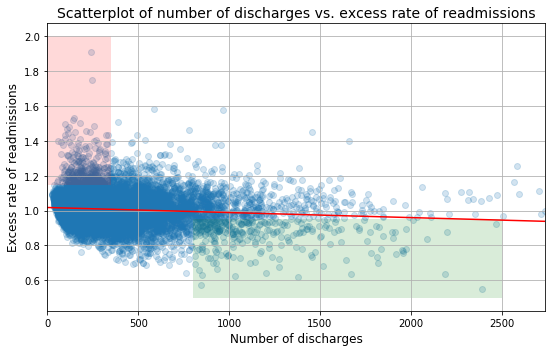

In [158]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

a, b = np.polyfit(discharges,readmissions,1)
x_theor = np.array([0, max(x)])
y_theor= a*x_theor+b

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
ax.plot(x_theor,y_theor,color='red')
ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()